## **Titanic Dataset Analysis**

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## **Data Cleaning & Preprocessing**

In [10]:
df = df.drop_duplicates()

In [12]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [14]:
#Fill missing Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

In [16]:
#Fill missing Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [18]:
# Drop unnecessary columns
df = df.drop(columns=['Cabin', 'Name', 'Ticket'])

In [20]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [22]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [24]:
df.shape

(891, 9)

In [26]:
#Change the data type of age from float into int
df['Age']=df['Age'].astype(int)

In [28]:
#Save cleaned dataset
df.to_csv("titanic_clean.csv", index=False)
print("Cleaned dataset saved as titanic_clean.csv")

Cleaned dataset saved as titanic_clean.csv


## **Exploratory Data Analysis (EDA)**

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


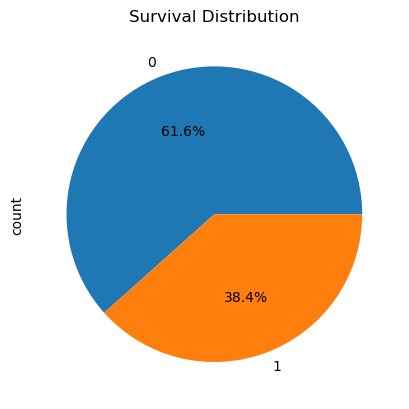

In [32]:
#Survival rate overview
print(df['Survived'].value_counts(normalize=True) * 100)

#Pie chart
df['Survived'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Survival Distribution")
plt.show()

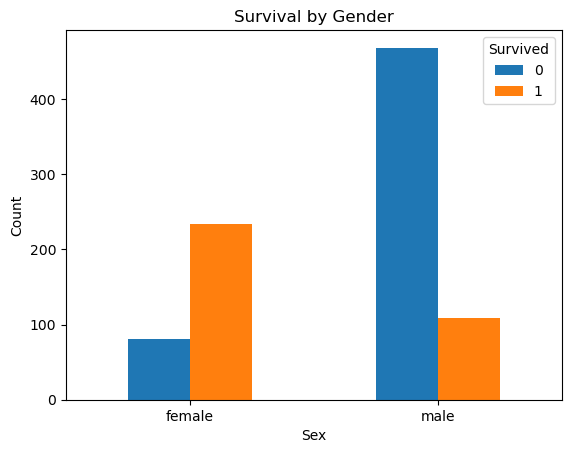

In [38]:
#By Gender
pd.crosstab(df['Sex'], df['Survived']).plot(kind='bar')
plt.title("Survival by Gender")
plt.ylabel("Count")
plt.xticks(rotation=0) 
plt.show()

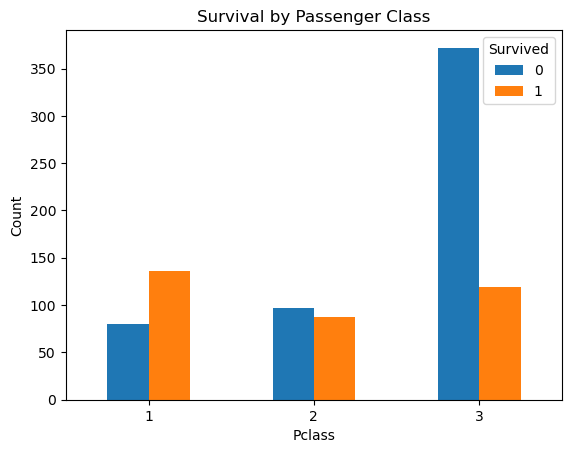

In [40]:
#By Passenger Class
pd.crosstab(df['Pclass'], df['Survived']).plot(kind='bar')
plt.title("Survival by Passenger Class")
plt.ylabel("Count")
plt.xticks(rotation=0) 
plt.show()

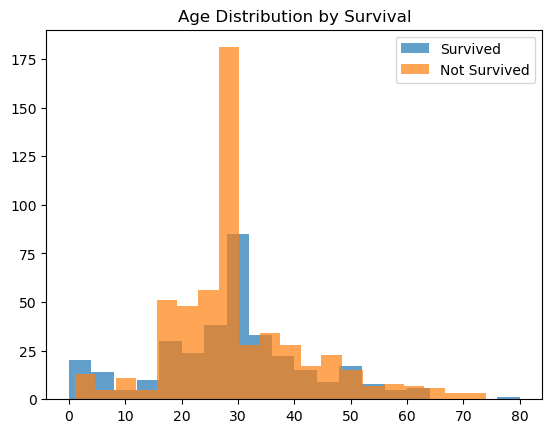

In [42]:
#Age distribution by survival
plt.hist(df[df['Survived']==1]['Age'], bins=20, alpha=0.7, label="Survived")
plt.hist(df[df['Survived']==0]['Age'], bins=20, alpha=0.7, label="Not Survived")
plt.legend()
plt.title("Age Distribution by Survival")
plt.show()

In [44]:
pip install plotly

In [46]:
#Create Fare Buckets
df['FareBucket'] = pd.qcut(df['Fare'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

In [56]:
import plotly.express as px

C:\Users\DELL\AppData\Local\Temp\ipykernel_14828\1321195625.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



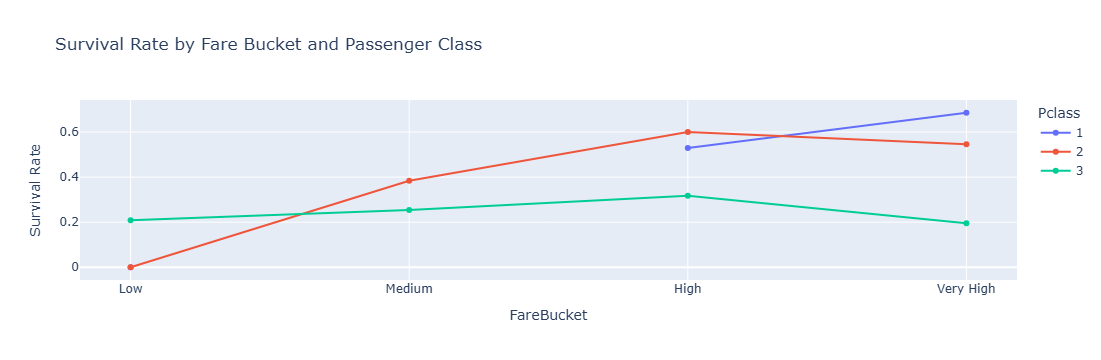

In [58]:
fare_survival = df.groupby(['FareBucket', 'Pclass'])['Survived'].mean().reset_index()

fig = px.line(fare_survival, x='FareBucket', y='Survived', color='Pclass',
              title="Survival Rate by Fare Bucket and Passenger Class",
              markers=True,
              labels={'Survived': 'Survival Rate'})
fig.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_14828\3954344560.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



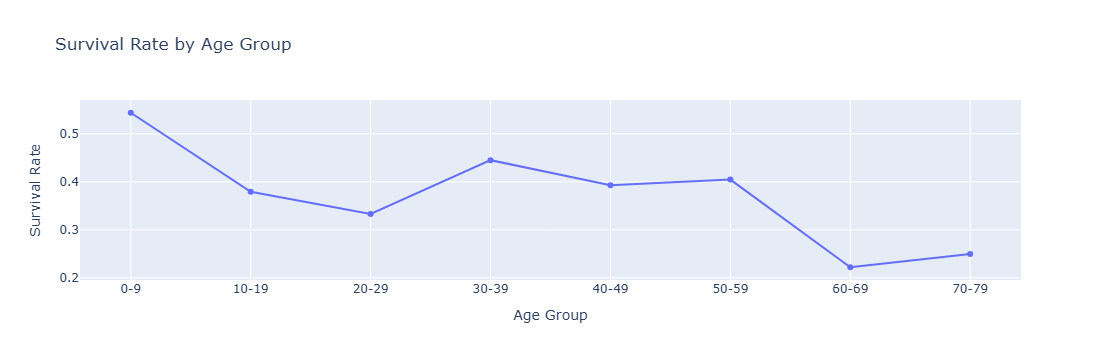

In [60]:
# Create Age Buckets
df['AgeBucket'] = pd.cut(df['Age'], bins=range(0, 81, 10), labels=[f"{i}-{i+9}" for i in range(0, 80, 10)])

# Group by AgeBucket
age_survival = df.groupby('AgeBucket')['Survived'].mean().reset_index()

fig = px.line(age_survival, x='AgeBucket', y='Survived',
              title="Survival Rate by Age Group",
              labels={'Survived': 'Survival Rate', 'AgeBucket': 'Age Group'},
              markers=True)
fig.show()

In [62]:
# Count + Survival Analysis by Age Bucket
age_analysis = df.groupby('AgeBucket').agg(
    Total_Passengers=('Survived', 'count'),
    Survivors=('Survived', 'sum')
).reset_index()

# Calculate survival rate
age_analysis['Survival Rate'] = age_analysis['Survivors'] / age_analysis['Total_Passengers']

print(age_analysis)

  AgeBucket  Total_Passengers  Survivors  Survival Rate
0       0-9                57         31       0.543860
1     10-19               116         44       0.379310
2     20-29               408        136       0.333333
3     30-39               155         69       0.445161
4     40-49                84         33       0.392857
5     50-59                42         17       0.404762
6     60-69                18          4       0.222222
7     70-79                 4          1       0.250000


C:\Users\DELL\AppData\Local\Temp\ipykernel_14828\382672211.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



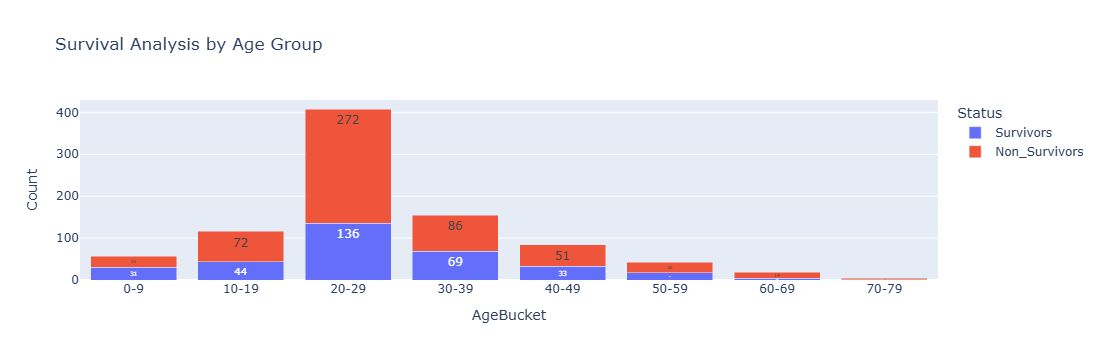

In [64]:
age_analysis['Non_Survivors'] = age_analysis['Total_Passengers'] - age_analysis['Survivors']

# Melt for stacked chart
age_melted = age_analysis.melt(id_vars='AgeBucket',
                               value_vars=['Survivors', 'Non_Survivors'],
                               var_name='Status',
                               value_name='Count')

fig = px.bar(age_melted,
             x='AgeBucket',
             y='Count',
             color='Status',
             title="Survival Analysis by Age Group",
             text='Count',
             barmode='stack')

fig.update_traces(textposition='inside')
fig.show()

## **🚢 Titanic EDA Insights**

**Gender Distribution & Survival**
* The number of male passengers was higher than females.
* However, the survival rate of females was significantly higher than that of males.

**Passenger Class (Pclass) & Survival**
* 1st Class (Upper class) passengers had the highest survival rate.
* 3rd Class (Lower class) passengers made up the largest share of deaths.
* Class played a major role in survival chances, showing socio-economic bias.

**Age Distribution & Survival**
* The 20–30 age group was the most represented on the ship.
* Teenagers formed a notable share of passengers but had a lower survival rate compared to children.


### **Overall**
* #### Survival on the Titanic was strongly influenced by gender, age, socio-economic status, and fare paid.
* #### Wealthier passengers (1st Class, high fares) had better access to lifeboats.
* #### Women and children were given evacuation priority.
* #### Young adults, especially males in lower classes, faced the lowest chances of survival.